In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("/content/breastcancerwisconsin.csv")

# Assuming the dataset has 'diagnosis' column, mapping 'M' to 0 (Malignant) and 'B' to 1 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

df = df.drop(columns=['id'], errors='ignore')

<ipython-input-4-b33bea4c6f2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['diagnosis'], palette=['green', 'red'])


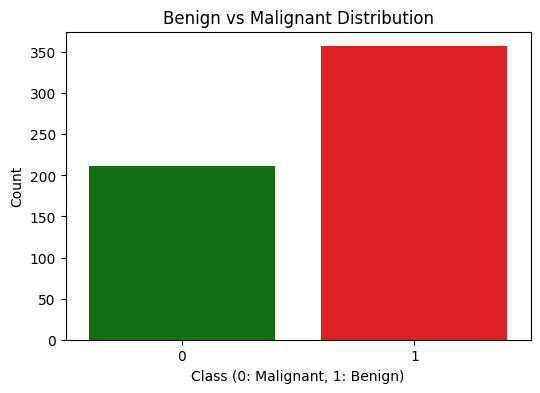

In [4]:
# Check class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['diagnosis'], palette=['green', 'red'])
plt.title("Benign vs Malignant Distribution")
plt.xlabel("Class (0: Malignant, 1: Benign)")
plt.ylabel("Count")
plt.show()

In [5]:
# Splitting dataset
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [7]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [9]:
# Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Decision Tree Accuracy: 0.9298245614035088
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



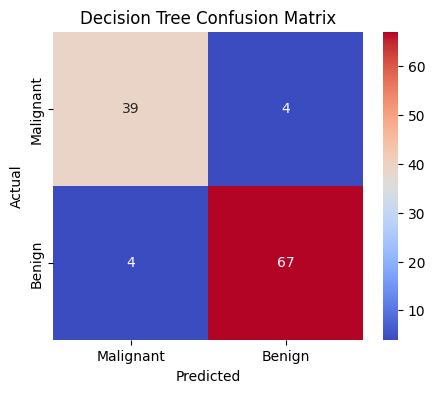

In [10]:
evaluate_model(y_test, y_pred_dt, "Decision Tree")

In [11]:
# Testing on Random Sample
random_sample = np.array(X_test[0]).reshape(1, -1)
prediction = dt_model.predict(random_sample)
print("Random Sample Prediction:", "Benign" if prediction[0] == 1 else "Malignant")

Random Sample Prediction: Benign
